Enrollment No : 180280116024 <br>
Sub : DAV

<h1><center>Practical 7 </center></h1>

<B>Aim :</B> Practical Implementation of KNN Algorithm <br><br>
1:Load the data<br>
2:Initialize K to your chosen number of neighbors<br>
3.For each example in the data<br>
    3.1 Calculate the distance between the query example and the current example from the data.<br>
    3.2 Add the distance and the index of the example to an ordered collection<br>
4.Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances<br>
5.Pick the first K entries from the sorted collection<br>
6.Get the labels of the selected K entries<br>
7.If regression, return the mean of the K labels<br>
8.If classification, return the mode of the K labels<br><br>


Task 1: Take Data set where 3 attributes should be there. 1. Length 2. Width 3. Species<br>
Task 2: Find Distance using Distance Formula<br>
Task 3: Find Rank <br>
Task 4: Find the K nearest neighbor <br>
Task 5: Practical Implementation of KNN<br>
          5.1: Import the Libraries<br>
          5.2: Import the dataset<br>
          5.3: Encode the categorical data<br>
          5.4: Split the dataset for test and train<br> 
          5.5: Feature Scaling<br>
Task 6: Building the KNN classifier module<br>
         6.1: Import the Libraries<br>
         6.2: Initialize the KNN model<br>
         6.3: Fitting the KNN model<br>
Task 7: Making the prediction and Visualizing the result<br>
The target is to find nearest species which belongs to three species using KNN.<br>

In [1]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load dataset

iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
#preprocess

X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

## Find Distance

In [5]:
# Calculating Euclidean distance
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)


In [6]:
row = X[:1].reshape(-1)
lst = []
for row1 in X:
    distance = euclidean_distance(row, row1)
    print(distance)
    lst.append(distance)

0.0
0.5385164807134502
0.509901951359278
0.648074069840786
0.1414213562373093
0.5830951894845303
0.5099019513592785
0.17320508075688762
0.9219544457292882
0.4582575694955836
0.37416573867739483
0.3741657386773941
0.58309518948453
0.9899494936611662
0.8831760866327848
1.0862780491200221
0.5099019513592787
0.0
0.7348469228349538
0.31622776601683783
0.4358898943540679
0.22360679774997916
0.648074069840786
0.36055512754639907
0.5916079783099616
0.5477225575051662
0.24494897427831785
0.14142135623730995
0.14142135623730995
0.53851648071345
0.5385164807134504
0.3316624790355407
0.6164414002968974
0.8062257748298554
0.4582575694955836
0.37416573867739383
0.41231056256176635
0.22360679774997838
0.866025403784438
0.14142135623730964
0.14142135623730917
1.3453624047073711
0.7681145747868601
0.22360679774997896
0.58309518948453
0.58309518948453
0.3605551275463989
0.58309518948453
0.30000000000000027
0.22360679774997896
3.8196858509568563
3.3749074061372415
3.9560080889704974
2.891366458960192
3.5

## rank the distance

In [7]:
#add distance in dataset

iris['dist'] = lst

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,dist
0,5.1,3.5,1.4,0.2,Setosa,0.000000
1,4.9,3.0,1.4,0.2,Setosa,0.538516
2,4.7,3.2,1.3,0.2,Setosa,0.509902
3,4.6,3.1,1.5,0.2,Setosa,0.648074
4,5.0,3.6,1.4,0.2,Setosa,0.141421


In [9]:
#sort by distance

iris = iris.sort_values(by=['dist'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,variety,dist
0,5.1,3.5,1.4,0.2,Setosa,0.000000
17,5.1,3.5,1.4,0.3,Setosa,0.000000
40,5.0,3.5,1.3,0.3,Setosa,0.141421
4,5.0,3.6,1.4,0.2,Setosa,0.141421
39,5.1,3.4,1.5,0.2,Setosa,0.141421


## Implement Knn

### Encode the categorical data

In [10]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
variety=le.fit_transform(iris.variety)
print(variety)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 1 2 2
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Split the dataset for test and train

In [11]:
# split data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


### Feature Scaling

In [12]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building the KNN classifier module

In [13]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [14]:
# predict output
y_pred = model.predict(X_test)

### Evaluate Model

In [15]:
# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  6  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.86      1.00      0.92         6
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



### predict output

In [16]:
model.predict(scaler.transform([[5.8, 2.8, 5.1, 2.4]]))

array(['Virginica'], dtype=object)

In [17]:
model.predict(scaler.transform([[5.1, 3.5, 1.4, 0.2]]))

array(['Setosa'], dtype=object)

## Find Best K values

In [18]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

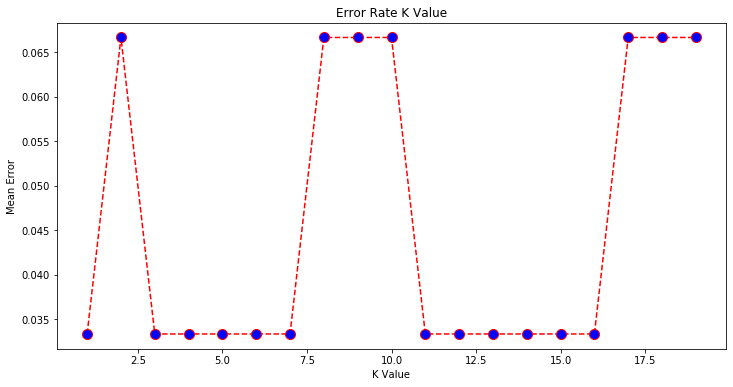

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

So, We can say that error is minimum between k values of 10 to 15

## Build model with k = 12

In [20]:
model = KNeighborsClassifier(n_neighbors=12)

# Train the model using the training sets
model.fit(X_train,y_train)

# predict output
y_pred = model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  6  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.86      1.00      0.92         6
   Virginica       1.00      0.93      0.97        15

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



Here, Accuracy is 0.97